# Importing the data

In [1]:
# Import necessary libraries
import pandas as pd
from deepchem.molnet import load_toxcast

# Load ToxCast dataset using DeepChem
toxcast_tasks, datasets, transformers = load_toxcast(
    featurizer='Raw',  # Use raw SMILES strings
    splitter='scaffold',  # Split based on molecular scaffolds
    reload=True          # Reload the dataset if cached
)

# Extract train, validation, and test datasets
train_dataset, valid_dataset, test_dataset = datasets

# Convert training dataset to a DataFrame for easier handling
df = pd.DataFrame({
    'SMILES': train_dataset.ids,  # SMILES strings representing chemical structures
    'Assay_Data': list(train_dataset.y)  # Assay data (toxicity labels)
})

# Display basic information about the dataset
print(f"Number of tasks (assays): {len(toxcast_tasks)}")
print(f"Training set size: {len(train_dataset)}")
print(f"Shape of assay data: {train_dataset.y.shape}")
print("First 3 rows of the dataset:")
print(df.head(3))


No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
2025-03-28 17:35:03.325528: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 17:35:03.517565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:17

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/home/kavin/miniconda3/envs/myenv/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
[17:35:23] Explicit valence for atom # 0 F, 1, is greater than permitted
Failed to featurize datapoint 1039, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True, bool includeAtomMaps=True, bool includeChiralPresence=False)
[17

Number of tasks (assays): 617
Training set size: 6863
Shape of assay data: (6863, 617)
First 3 rows of the dataset:
                                      SMILES  \
0  C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C   
1                             CCCCCCCC(OC)OC   
2   [Ba++].[O-][N+]([O-])=O.[O-][N+]([O-])=O   

                                          Assay_Data  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


# Visualizing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem import AllChem

# Ensure reproducibility
np.random.seed(42)


In [3]:
# Assuming the ToxCast dataset is already loaded into a DataFrame named `df`
# Example structure:
# df = pd.DataFrame({
#     'SMILES': ['C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C', 'CCCCCCCC(OC)OC', '[Ba++].[O-][N+]([O-])=O.[O-][N+]([O-])=O'],
#     'Assay_Data': [
#         np.random.choice([0, 1, np.nan], size=617, p=[0.45, 0.45, 0.1]),
#         np.random.choice([0, 1, np.nan], size=617, p=[0.45, 0.45, 0.1]),
#         np.random.choice([0, 1, np.nan], size=617, p=[0.45, 0.45, 0.1])
#     ]
# })

# Check dataset structure
print("Dataset loaded successfully.")
print(f"Number of compounds: {df.shape[0]}")
print(f"Number of assays: {len(df['Assay_Data'][0])}")


Dataset loaded successfully.
Number of compounds: 6863
Number of assays: 617


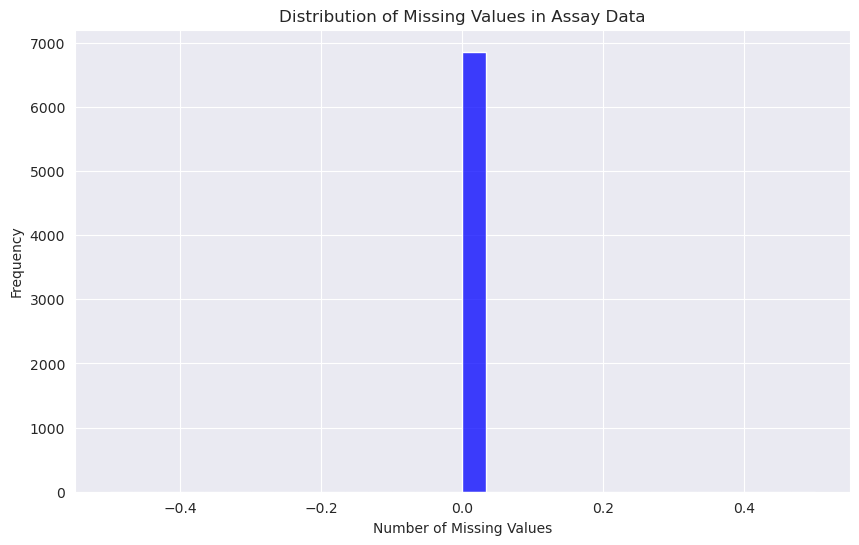

In [4]:
# Count missing values in assay data for each compound
missing_values = df['Assay_Data'].apply(lambda x: np.sum(pd.isna(x)))

# Plot distribution of missing values
plt.figure(figsize=(10, 6))
sns.histplot(missing_values, bins=30, kde=False, color='blue')
plt.title('Distribution of Missing Values in Assay Data')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.show()


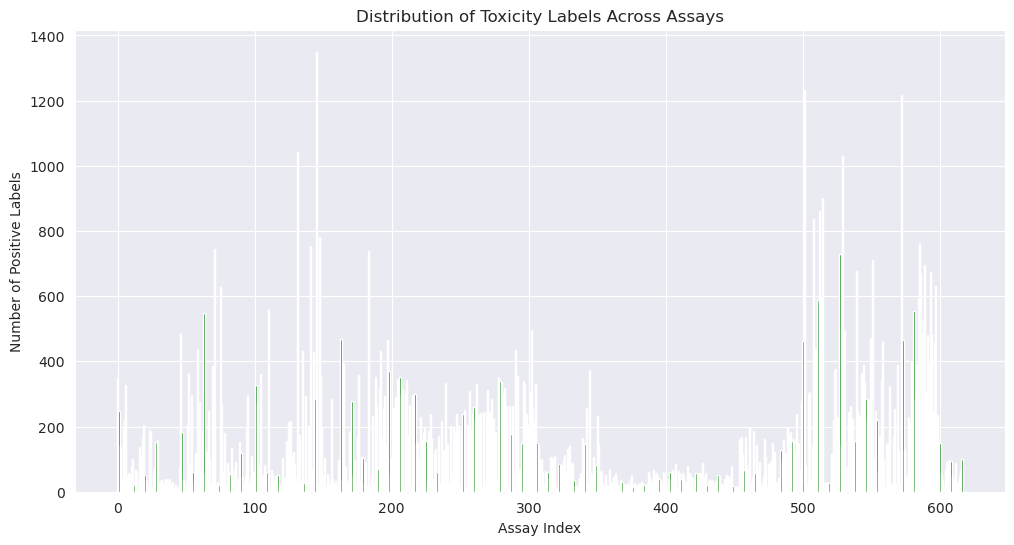

In [5]:
# Sum positive labels (1s) across all assays for each compound
label_counts = np.sum(np.vstack(df['Assay_Data'].values), axis=0)

# Plot distribution of positive toxicity labels across assays
plt.figure(figsize=(12, 6))
plt.bar(range(len(label_counts)), label_counts, color='green')
plt.title('Distribution of Toxicity Labels Across Assays')
plt.xlabel('Assay Index')
plt.ylabel('Number of Positive Labels')
plt.show()


[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerator
[17:35:29] DEPRECATION WARNING: please use MorganGenerat

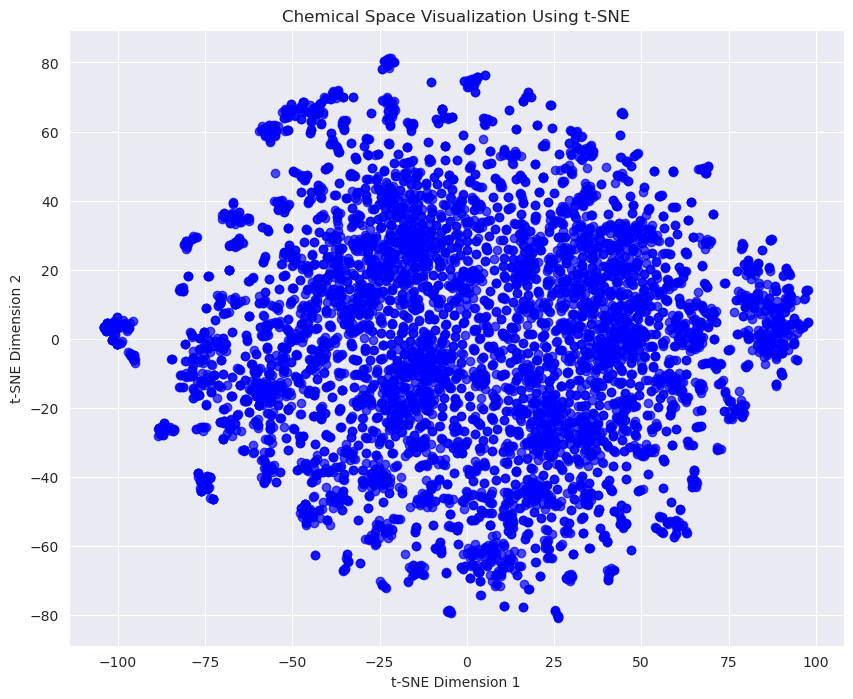

In [6]:
def generate_fingerprints(smiles_list):
    """Generate Morgan fingerprints for a list of SMILES strings."""
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
            fingerprints.append(np.array(fp))
    return np.array(fingerprints)

# Generate molecular fingerprints for the dataset
fingerprints = generate_fingerprints(df['SMILES'])

# Apply t-SNE for dimensionality reduction to visualize chemical space
tsne = TSNE(n_components=2, random_state=42)
chemical_space = tsne.fit_transform(fingerprints)

# Plot chemical space
plt.figure(figsize=(10, 8))
plt.scatter(chemical_space[:, 0], chemical_space[:, 1], alpha=0.7, c='blue')
plt.title('Chemical Space Visualization Using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Random forest implementation

In [8]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
train_df=df
# Generate fingerprints for all datasets (train, valid, test)
def generate_fingerprints(smiles_list):
    """Generate Morgan fingerprints for a list of SMILES strings."""
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
            fingerprints.append(np.array(fp))
        else:
            # Handle invalid SMILES with a zero vector
            fingerprints.append(np.zeros(1024, dtype=int))
    return np.array(fingerprints)

# Convert validation and test datasets to DataFrames
valid_df = pd.DataFrame({
    'SMILES': valid_dataset.ids,
    'Assay_Data': list(valid_dataset.y)
})

test_df = pd.DataFrame({
    'SMILES': test_dataset.ids,
    'Assay_Data': list(test_dataset.y)
})

# Generate fingerprints for all datasets
train_fingerprints = generate_fingerprints(train_df['SMILES'])
valid_fingerprints = generate_fingerprints(valid_df['SMILES'])
test_fingerprints = generate_fingerprints(test_df['SMILES'])

# Initialize list to store performance metrics
performance = []

# Loop through each assay task
for task_idx, task_name in enumerate(toxcast_tasks):
    # Extract labels for the current task
    y_train = train_df['Assay_Data'].apply(lambda x: x[task_idx])
    y_valid = valid_df['Assay_Data'].apply(lambda x: x[task_idx])
    y_test = test_df['Assay_Data'].apply(lambda x: x[task_idx])

    # Create masks to filter out NaN labels
    train_mask = ~y_train.isna()
    valid_mask = ~y_valid.isna()
    test_mask = ~y_test.isna()

    # Skip tasks with no training data
    if train_mask.sum() == 0:
        print(f"Skipping task {task_name} (no training data)")
        continue

    # Prepare features and labels
    X_train_task = train_fingerprints[train_mask]
    y_train_task = y_train[train_mask].astype(int)

    X_valid_task = valid_fingerprints[valid_mask]
    y_valid_task = y_valid[valid_mask].astype(int)

    X_test_task = test_fingerprints[test_mask]
    y_test_task = y_test[test_mask].astype(int)

    # Initialize and train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_task, y_train_task)

    # Predict on validation and test sets
    valid_pred = rf.predict(X_valid_task)
    test_pred = rf.predict(X_test_task)

    # Calculate accuracy
    valid_acc = accuracy_score(y_valid_task, valid_pred) if len(y_valid_task) > 0 else np.nan
    test_acc = accuracy_score(y_test_task, test_pred) if len(y_test_task) > 0 else np.nan

    # Calculate AUC (handle cases with only one class)
    valid_auc = np.nan
    if len(np.unique(y_valid_task)) >= 2:
        valid_proba = rf.predict_proba(X_valid_task)[:, 1]
        valid_auc = roc_auc_score(y_valid_task, valid_proba)

    test_auc = np.nan
    if len(np.unique(y_test_task)) >= 2:
        test_proba = rf.predict_proba(X_test_task)[:, 1]
        test_auc = roc_auc_score(y_test_task, test_proba)

    # Store results
    performance.append({
        'Task': task_name,
        'Validation Accuracy': valid_acc,
        'Validation AUC': valid_auc,
        'Test Accuracy': test_acc,
        'Test AUC': test_auc
    })

    # Print progress
    print(f"Task {task_name}:")
    print(f"  Validation Accuracy: {valid_acc:.3f} | AUC: {valid_auc:.3f}")
    print(f"  Test Accuracy: {test_acc:.3f} | AUC: {test_auc:.3f}\n")

# Convert results to DataFrame and compute averages
performance_df = pd.DataFrame(performance)
print("\nAverage Performance Across All Tasks:")
print(performance_df.mean(numeric_only=True))

[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerator
[17:39:24] DEPRECATION WARNING: please use MorganGenerat

Task ACEA_T47D_80hr_Negative:
  Validation Accuracy: 0.956 | AUC: 0.645
  Test Accuracy: 0.934 | AUC: 0.659

Task ACEA_T47D_80hr_Positive:
  Validation Accuracy: 0.973 | AUC: 0.634
  Test Accuracy: 0.966 | AUC: 0.526

Task APR_HepG2_CellCycleArrest_24h_dn:
  Validation Accuracy: 0.985 | AUC: 0.802
  Test Accuracy: 0.973 | AUC: 0.623

Task APR_HepG2_CellCycleArrest_24h_up:
  Validation Accuracy: 0.998 | AUC: 0.285
  Test Accuracy: 0.992 | AUC: 0.625

Task APR_HepG2_CellCycleArrest_72h_dn:
  Validation Accuracy: 0.980 | AUC: 0.618
  Test Accuracy: 0.959 | AUC: 0.653

Task APR_HepG2_CellLoss_24h_dn:
  Validation Accuracy: 0.966 | AUC: 0.757
  Test Accuracy: 0.944 | AUC: 0.673

Task APR_HepG2_CellLoss_72h_dn:
  Validation Accuracy: 0.950 | AUC: 0.706
  Test Accuracy: 0.913 | AUC: 0.743

Task APR_HepG2_MicrotubuleCSK_24h_dn:
  Validation Accuracy: 0.994 | AUC: 0.782
  Test Accuracy: 0.992 | AUC: 0.630

Task APR_HepG2_MicrotubuleCSK_24h_up:
  Validation Accuracy: 0.988 | AUC: 0.763
  Test Ac

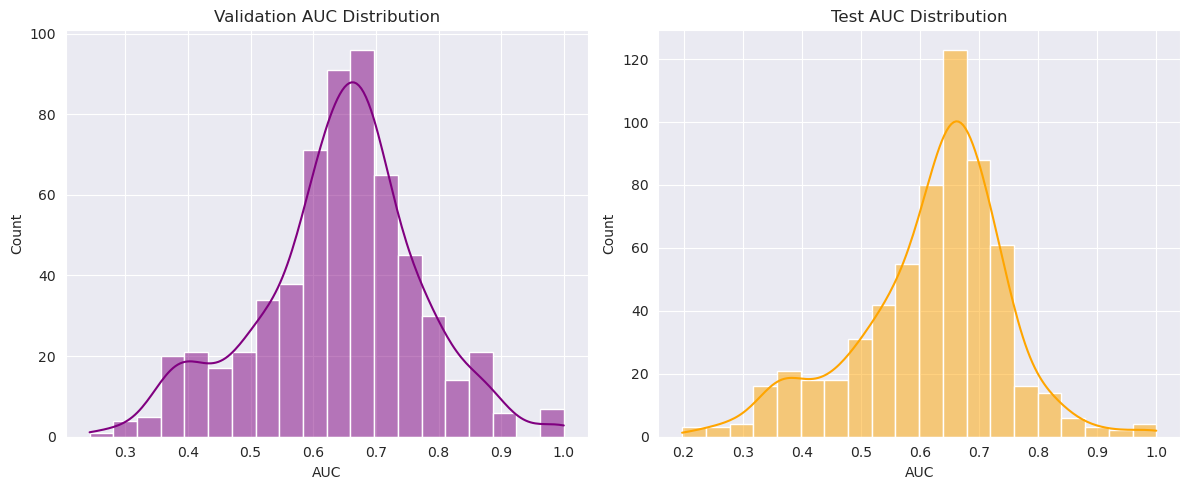

In [9]:
# Plot AUC distribution for validation and test sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(performance_df['Validation AUC'].dropna(), bins=20, kde=True, color='purple')
plt.title('Validation AUC Distribution')
plt.xlabel('AUC')

plt.subplot(1, 2, 2)
sns.histplot(performance_df['Test AUC'].dropna(), bins=20, kde=True, color='orange')
plt.title('Test AUC Distribution')
plt.xlabel('AUC')
plt.tight_layout()
plt.show()

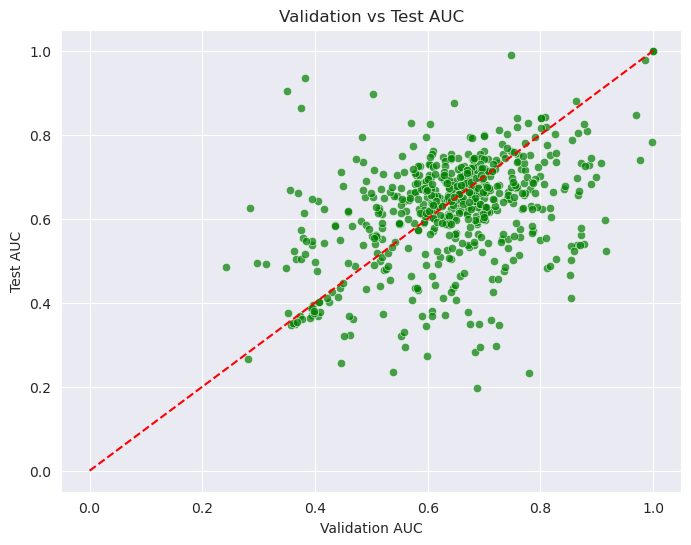

In [10]:
# Scatter plot of Validation AUC vs Test AUC
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Validation AUC',
    y='Test AUC',
    data=performance_df,
    alpha=0.7,
    color='green'
)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal reference line
plt.title('Validation vs Test AUC')
plt.show()

[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerator
[18:06:27] DEPRECATION WARNING: please use MorganGenerat

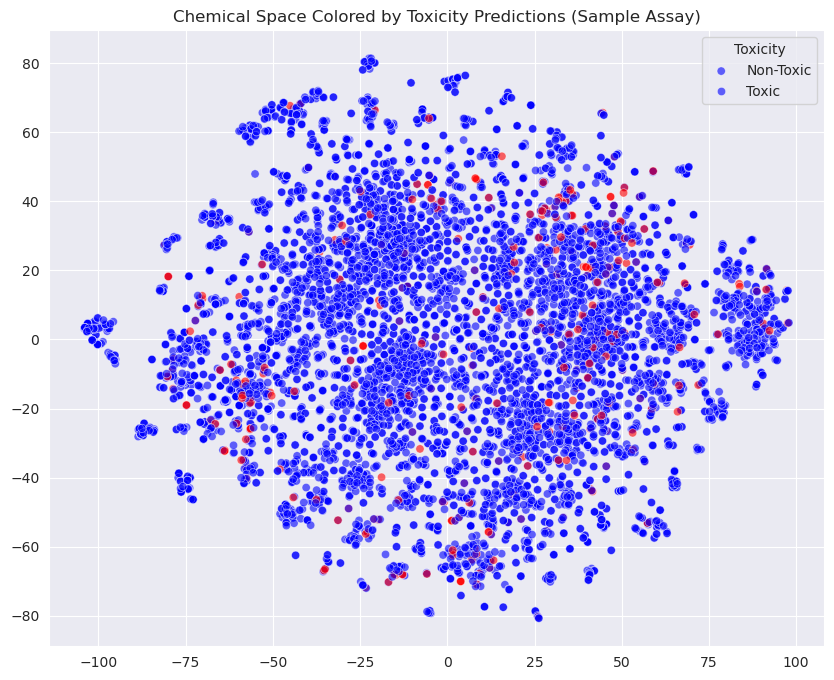

In [11]:
# Generate predictions for the entire dataset
all_smiles = pd.concat([df['SMILES'], valid_df['SMILES'], test_df['SMILES']])
all_fingerprints = generate_fingerprints(all_smiles)

# Predict toxicity for a sample assay (e.g., first task)
sample_task_idx = 0
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_fingerprints, df['Assay_Data'].apply(lambda x: x[sample_task_idx]).dropna())
preds = rf.predict(all_fingerprints)  # 0 (non-toxic) or 1 (toxic)

# Overlay predictions on t-SNE chemical space
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=chemical_space[:, 0],
    y=chemical_space[:, 1],
    hue=preds[:len(chemical_space)],  # Match dimensions
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
plt.title('Chemical Space Colored by Toxicity Predictions (Sample Assay)')
plt.legend(title='Toxicity', labels=['Non-Toxic', 'Toxic'])
plt.show()

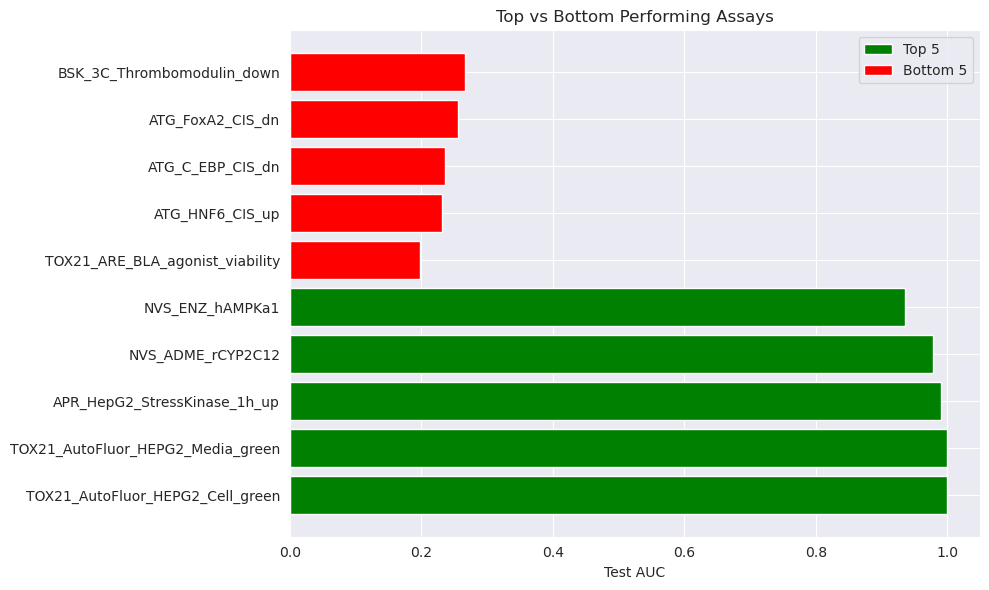

In [12]:
# Identify top/bottom 5 assays by test AUC
top_assays = performance_df.nlargest(5, 'Test AUC')['Task']
bottom_assays = performance_df.nsmallest(5, 'Test AUC')['Task']

# Plot comparison
plt.figure(figsize=(10, 6))
plt.barh(top_assays, performance_df.nlargest(5, 'Test AUC')['Test AUC'], color='green', label='Top 5')
plt.barh(bottom_assays, performance_df.nsmallest(5, 'Test AUC')['Test AUC'], color='red', label='Bottom 5')
plt.xlabel('Test AUC')
plt.title('Top vs Bottom Performing Assays')
plt.legend()
plt.tight_layout()
plt.show()

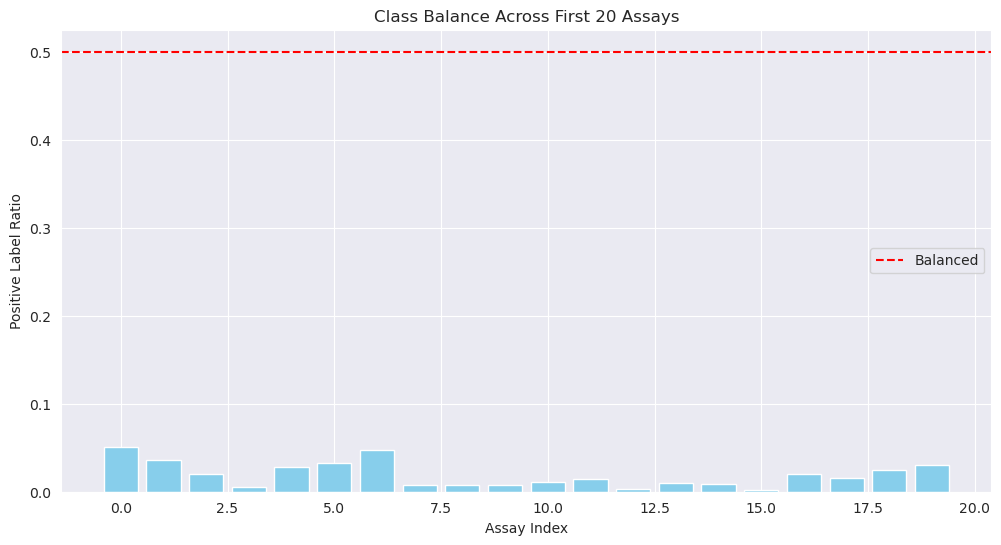

In [13]:
# Plot positive/negative label ratio for the first 20 assays
plt.figure(figsize=(12, 6))
for task_idx in range(20):
    y_task = df['Assay_Data'].apply(lambda x: x[task_idx]).dropna()
    positive_ratio = np.mean(y_task)
    plt.bar(task_idx, positive_ratio, color='skyblue')

plt.axhline(0.5, color='red', linestyle='--', label='Balanced')
plt.xlabel('Assay Index')
plt.ylabel('Positive Label Ratio')
plt.title('Class Balance Across First 20 Assays')
plt.legend()
plt.show()

# Implementation of GNN

In [14]:
# Install PyTorch Geometric (if not already installed)
!pip install torch_geometric
!pip install rdkit-pypi

# Import libraries
import torch
import numpy as np
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
from rdkit import Chem
from rdkit.Chem import rdmolops
from sklearn.metrics import roc_auc_score

# Check CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 1.1 MB/s eta 0:00:0000:0100:010m
Using device: cuda


In [25]:
# Import libraries
import torch
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
from rdkit import Chem
import numpy as np

# Custom Dataset Class
class ToxCastDataset(Dataset):
    def __init__(self, df):
        self.smiles = df['SMILES'].tolist()
        self.assay_data = np.stack(df['Assay_Data'].values)  # Convert to numpy array

    def __len__(self):
        return len(self.smiles)

    def __getitem__(self, idx):
        smiles = self.smiles[idx]
        assay_values = self.assay_data[idx]

        # Convert SMILES to molecular graph
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return None

        # Atom features (atomic number, degree, hybridization)
        atom_features = []
        for atom in mol.GetAtoms():
            features = [
                float(atom.GetAtomicNum()),
                float(atom.GetDegree()),
                float(atom.GetHybridization().real)
            ]
            atom_features.append(features)

        # Edge indices
        edge_index = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_index.extend([[i, j], [j, i]])

        return Data(
            x=torch.tensor(atom_features, dtype=torch.float),
            edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
            y=torch.tensor(assay_values, dtype=torch.float))

In [26]:
# Create datasets
train_pyg = ToxCastDataset(df)
valid_pyg = ToxCastDataset(valid_df)
test_pyg = ToxCastDataset(test_df)

# Filter invalid molecules
train_data = [data for data in train_pyg if data is not None]
valid_data = [data for data in valid_pyg if data is not None]
test_data = [data for data in test_pyg if data is not None]

# Create loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

[18:25:06] WARNING: not removing hydrogen atom without neighbors
/home/kavin/miniconda3/envs/myenv/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [27]:
class GNN(torch.nn.Module):
    def __init__(self, in_channels, out_channels=617):  # 617 assays
        super().__init__()
        self.conv1 = GCNConv(in_channels, 64)
        self.conv2 = GCNConv(64, 64)
        self.lin = torch.nn.Linear(64, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv2(x, edge_index))

        x = global_mean_pool(x, batch)
        return torch.sigmoid(self.lin(x))

In [33]:
# Import libraries
import torch
import numpy as np
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
from rdkit import Chem

# Custom Dataset Class (Fixed)
class ToxCastDataset(Dataset):
    def __init__(self, df):
        self.smiles = df['SMILES'].tolist()
        self.assay_data = np.stack(df['Assay_Data'].values)  # Shape: [num_samples, 617]

    def __len__(self):
        return len(self.smiles)

    def __getitem__(self, idx):
        smiles = self.smiles[idx]
        assay_values = self.assay_data[idx]  # Shape: [617]

        # Convert SMILES to molecular graph
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return None

        # Atom features (3 features per atom)
        atom_features = []
        for atom in mol.GetAtoms():
            features = [
                float(atom.GetAtomicNum()),
                float(atom.GetDegree()),
                float(atom.GetHybridization().real)
            ]
            atom_features.append(features)

        # Edge indices (undirected edges)
        edge_index = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_index.extend([[i, j], [j, i]])

        return Data(
            x=torch.tensor(atom_features, dtype=torch.float),
            edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
            y=torch.tensor(assay_values, dtype=torch.float).unsqueeze(0)  # Shape: [1, 617]
        )

# Create datasets
train_pyg = ToxCastDataset(df)
valid_pyg = ToxCastDataset(valid_df)
test_pyg = ToxCastDataset(test_df)

# Filter invalid molecules
train_data = [data for data in train_pyg if data is not None]
valid_data = [data for data in valid_pyg if data is not None]
test_data = [data for data in test_pyg if data is not None]

# Create loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# GNN Model
class GNN(torch.nn.Module):
    def __init__(self, in_channels=3, out_channels=617):  # 3 input features, 617 assays
        super().__init__()
        self.conv1 = GCNConv(in_channels, 64)
        self.conv2 = GCNConv(64, 64)
        self.lin = torch.nn.Linear(64, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv2(x, edge_index))

        x = global_mean_pool(x, batch)
        return torch.sigmoid(self.lin(x))  # Shape: [batch_size, 617]

# Training Loop (Fixed Masking)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # Shape: [batch_size, 617]

        # Mask NaN values (2D mask)
        mask = ~torch.isnan(data.y)  # Shape: [batch_size, 617]

        # Calculate loss only on valid labels
        loss = F.binary_cross_entropy(
            out[mask],
            data.y[mask]
        )

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

@torch.no_grad()
def test(loader):
    model.eval()
    preds, truths = [], []
    for data in loader:
        data = data.to(device)
        out = model(data)
        mask = ~torch.isnan(data.y)
        preds.append(out[mask].cpu())
        truths.append(data.y[mask].cpu())
    return roc_auc_score(torch.cat(truths).numpy(), torch.cat(preds).numpy())

# Train the model
for epoch in range(1, 101):
    loss = train()
    val_auc = test(valid_loader)
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Val AUC: {val_auc:.4f}')

[18:38:05] WARNING: not removing hydrogen atom without neighbors
/home/kavin/miniconda3/envs/myenv/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001, Loss: 0.1534, Val AUC: 0.7856
Epoch 002, Loss: 0.1009, Val AUC: 0.7839
Epoch 003, Loss: 0.0998, Val AUC: 0.7836
Epoch 004, Loss: 0.0996, Val AUC: 0.7795
Epoch 005, Loss: 0.0989, Val AUC: 0.7811
Epoch 006, Loss: 0.0987, Val AUC: 0.7826
Epoch 007, Loss: 0.0990, Val AUC: 0.7820
Epoch 008, Loss: 0.0987, Val AUC: 0.7815
Epoch 009, Loss: 0.0987, Val AUC: 0.7829
Epoch 010, Loss: 0.0981, Val AUC: 0.7852
Epoch 011, Loss: 0.0977, Val AUC: 0.7791
Epoch 012, Loss: 0.0980, Val AUC: 0.7852
Epoch 013, Loss: 0.0977, Val AUC: 0.7868
Epoch 014, Loss: 0.0977, Val AUC: 0.7844
Epoch 015, Loss: 0.0985, Val AUC: 0.7855
Epoch 016, Loss: 0.0979, Val AUC: 0.7846
Epoch 017, Loss: 0.0974, Val AUC: 0.7853
Epoch 018, Loss: 0.0971, Val AUC: 0.7873
Epoch 019, Loss: 0.0974, Val AUC: 0.7867
Epoch 020, Loss: 0.0970, Val AUC: 0.7843
Epoch 021, Loss: 0.0966, Val AUC: 0.7876
Epoch 022, Loss: 0.0971, Val AUC: 0.7873
Epoch 023, Loss: 0.0964, Val AUC: 0.7907
Epoch 024, Loss: 0.0969, Val AUC: 0.7887
Epoch 025, Loss:

Epoch 001, Loss: 0.0935, Val AUC: 0.7976
Epoch 002, Loss: 0.0936, Val AUC: 0.7976
Epoch 003, Loss: 0.0933, Val AUC: 0.7974
Epoch 004, Loss: 0.0929, Val AUC: 0.7975
Epoch 005, Loss: 0.0931, Val AUC: 0.7985
Epoch 006, Loss: 0.0931, Val AUC: 0.7985
Epoch 007, Loss: 0.0933, Val AUC: 0.7998
Epoch 008, Loss: 0.0933, Val AUC: 0.7995
Epoch 009, Loss: 0.0933, Val AUC: 0.7990
Epoch 010, Loss: 0.0929, Val AUC: 0.7994
Epoch 011, Loss: 0.0931, Val AUC: 0.7991
Epoch 012, Loss: 0.0931, Val AUC: 0.7987
Epoch 013, Loss: 0.0930, Val AUC: 0.7984
Epoch 014, Loss: 0.0931, Val AUC: 0.7993
Epoch 015, Loss: 0.0933, Val AUC: 0.7996
Epoch 016, Loss: 0.0932, Val AUC: 0.7993
Epoch 017, Loss: 0.0927, Val AUC: 0.7940
Epoch 018, Loss: 0.0931, Val AUC: 0.7998
Epoch 019, Loss: 0.0931, Val AUC: 0.7984
Epoch 020, Loss: 0.0927, Val AUC: 0.7989
Epoch 021, Loss: 0.0928, Val AUC: 0.7992
Epoch 022, Loss: 0.0928, Val AUC: 0.7979
Epoch 023, Loss: 0.0929, Val AUC: 0.8002
Epoch 024, Loss: 0.0926, Val AUC: 0.7977
Epoch 025, Loss:

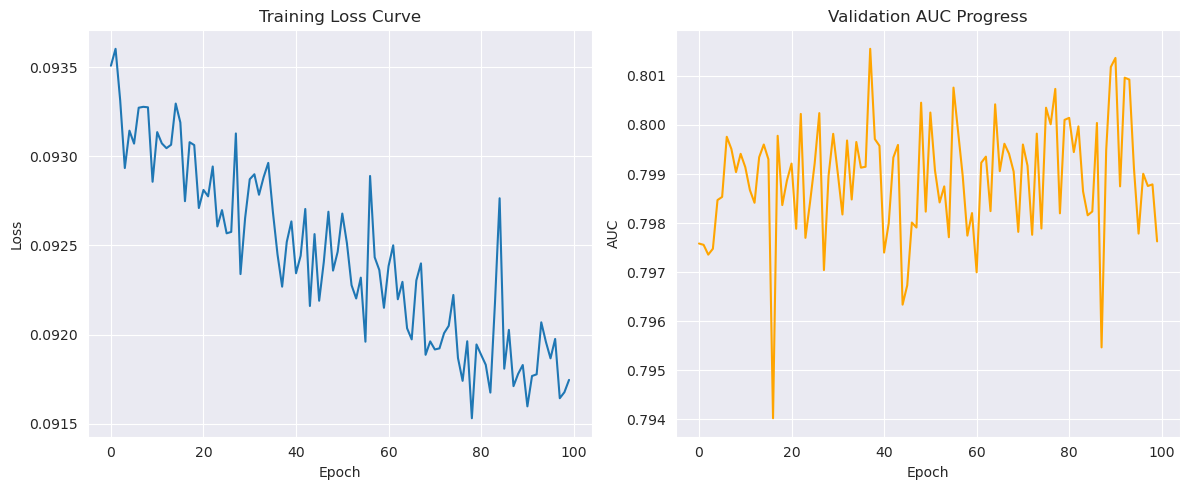

In [34]:
# Add these to track metrics during training
train_losses = []
val_aucs = []

# Modified training loop
for epoch in range(1, 101):
    loss = train()
    val_auc = test(valid_loader)
    train_losses.append(loss)
    val_aucs.append(val_auc)
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Val AUC: {val_auc:.4f}')

# Plot metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(val_aucs, label='Validation AUC', color='orange')
plt.title('Validation AUC Progress')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.tight_layout()
plt.show()

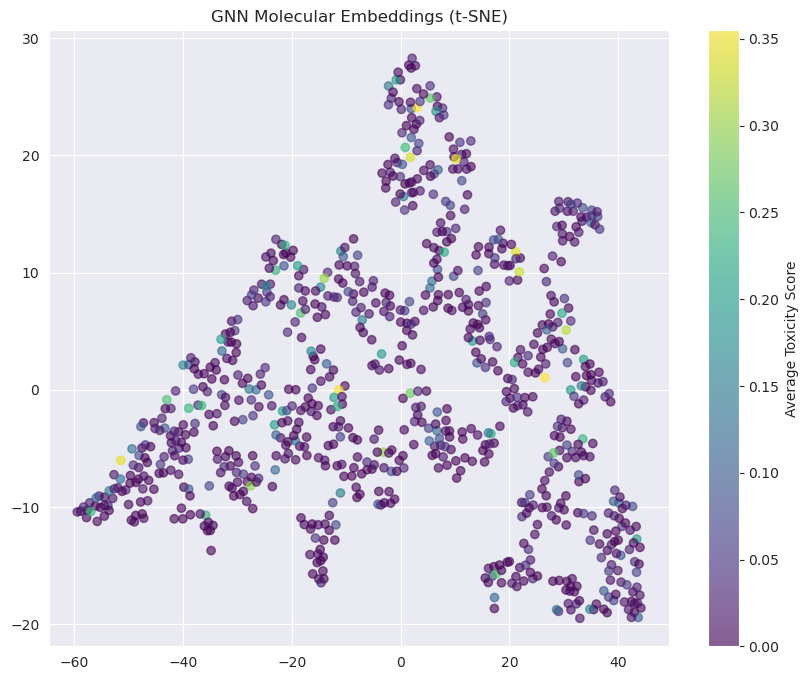

In [35]:
@torch.no_grad()
def get_embeddings(loader):
    model.eval()
    embeddings, labels = [], []
    for data in loader:
        data = data.to(device)
        # Extract graph convolution outputs before classification layer
        x = model.conv1(data.x, data.edge_index)
        x = model.conv2(x, data.edge_index)
        x = global_mean_pool(x, data.batch)
        embeddings.append(x.cpu())
        labels.append(data.y.cpu())
    return torch.cat(embeddings), torch.cat(labels)

# Get embeddings for test set
embeddings, labels = get_embeddings(test_loader)

# Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
emb_2d = tsne.fit_transform(embeddings.numpy())

# Plot with toxicity intensity
plt.figure(figsize=(10, 8))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1],
            c=labels.nanmean(dim=1).numpy(),  # Average toxicity across assays
            cmap='viridis', alpha=0.6)
plt.colorbar(label='Average Toxicity Score')
plt.title('GNN Molecular Embeddings (t-SNE)')
plt.show()

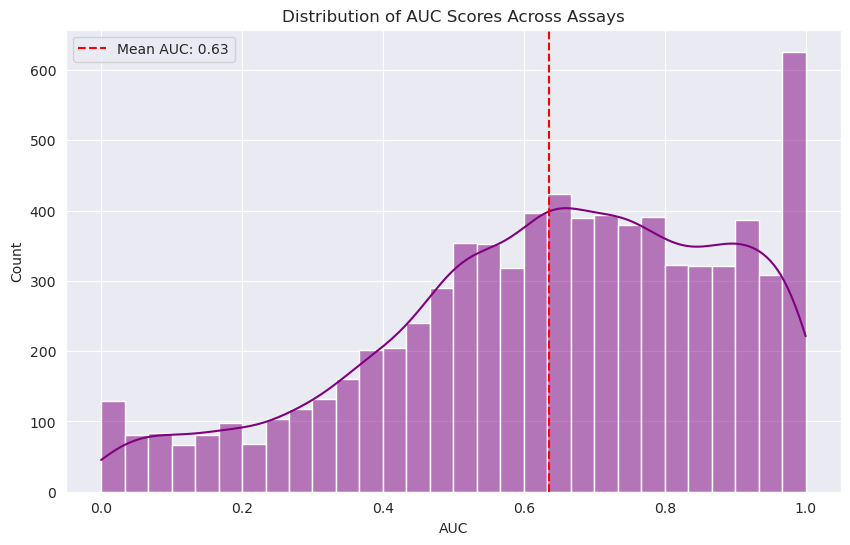

In [36]:
# Get final predictions
@torch.no_grad()
def get_assay_performance(loader):
    model.eval()
    auc_scores = []
    for data in loader:
        data = data.to(device)
        out = model(data)
        mask = ~torch.isnan(data.y)
        for i in range(data.y.shape[1]):  # Iterate through each assay
            assay_mask = mask[:, i]
            if assay_mask.sum() > 0 and len(torch.unique(data.y[assay_mask, i])) == 2:
                auc = roc_auc_score(
                    data.y[assay_mask, i].cpu().numpy(),
                    out[assay_mask, i].cpu().numpy()
                )
                auc_scores.append(auc)
    return auc_scores

assay_aucs = get_assay_performance(test_loader)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(assay_aucs, bins=30, kde=True, color='purple')
plt.axvline(np.mean(assay_aucs), color='red', linestyle='--',
            label=f'Mean AUC: {np.mean(assay_aucs):.2f}')
plt.title('Distribution of AUC Scores Across Assays')
plt.xlabel('AUC')
plt.legend()
plt.show()

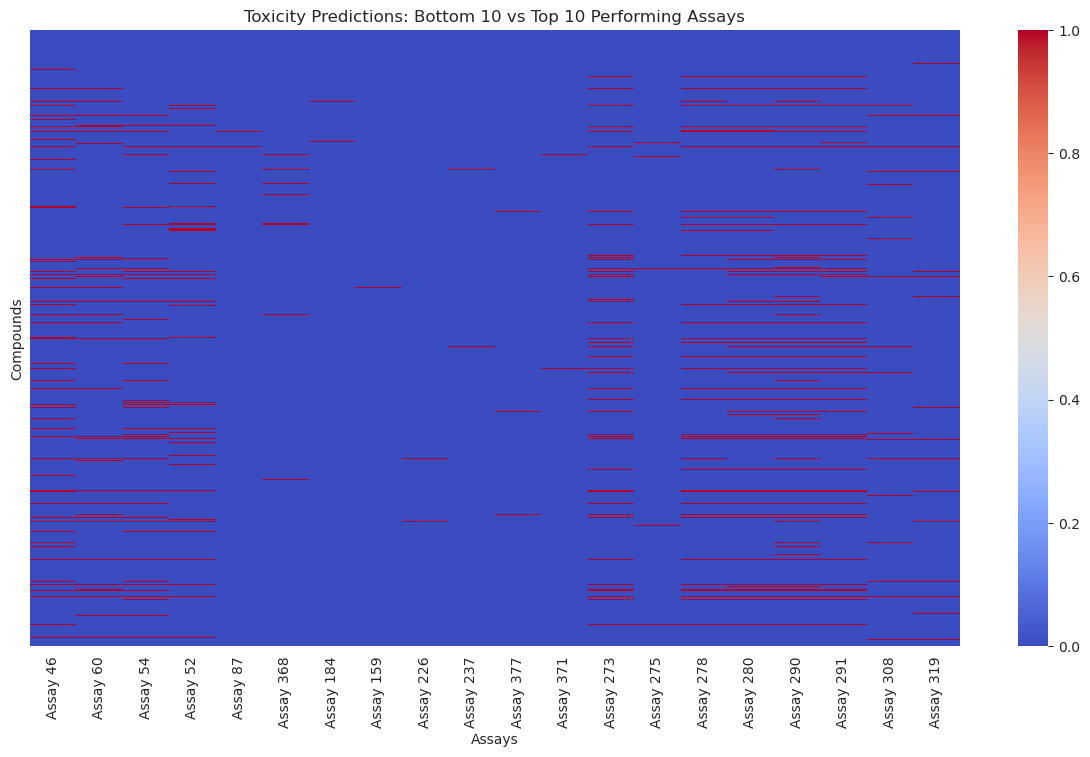

In [38]:
# 1. Get assay AUCs with proper indices (0-616)
@torch.no_grad()
def get_assay_performance(loader):
    model.eval()
    auc_scores = np.full(len(toxcast_tasks), np.nan)  # Initialize with NaNs (size 617)

    for data in loader:
        data = data.to(device)
        out = model(data)
        mask = ~torch.isnan(data.y)

        for assay_idx in range(len(toxcast_tasks)):  # Iterate through all 617 assays
            assay_mask = mask[:, assay_idx]
            if assay_mask.sum() > 0 and len(torch.unique(data.y[assay_mask, assay_idx])) == 2:
                auc = roc_auc_score(
                    data.y[assay_mask, assay_idx].cpu().numpy(),
                    out[assay_mask, assay_idx].cpu().numpy()
                )
                auc_scores[assay_idx] = auc  # Update specific assay index

    return auc_scores

assay_aucs = get_assay_performance(test_loader)

# 2. Identify valid top/bottom assays (skip NaNs)
valid_aucs = np.where(~np.isnan(assay_aucs))[0]
sorted_indices = np.argsort(assay_aucs[valid_aucs])

# Get top 10 and bottom 10 assay indices
bottom_assays = valid_aucs[sorted_indices[:10]]
top_assays = valid_aucs[sorted_indices[-10:]]

# 3. Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    labels.numpy()[:, np.concatenate([bottom_assays, top_assays])],  # Use correct indices
    cmap='coolwarm',
    yticklabels=False,
    xticklabels=[f'Assay {i}' for i in np.concatenate([bottom_assays, top_assays])]
)
plt.title('Toxicity Predictions: Bottom 10 vs Top 10 Performing Assays')
plt.xlabel('Assays')
plt.ylabel('Compounds')
plt.show()

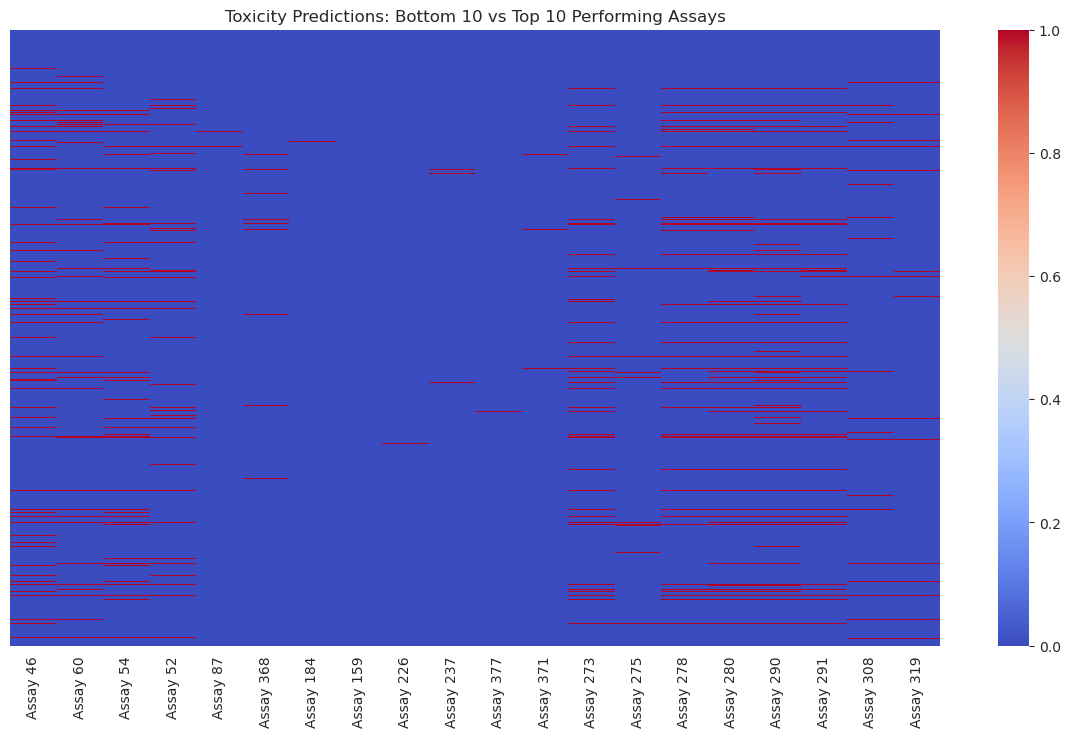

In [40]:
# 1. Get assay performance
assay_aucs = get_assay_performance(test_loader)

# 2. Filter valid assays and sort
valid_aucs = np.where(~np.isnan(assay_aucs))[0]
sorted_indices = np.argsort(assay_aucs[valid_aucs])

# 3. Select top/bottom assays (cast to integers)
bottom_assays = valid_aucs[sorted_indices[:10]].astype(int)
top_assays = valid_aucs[sorted_indices[-10:]].astype(int)

# 4. Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    labels.numpy()[:, np.concatenate([bottom_assays, top_assays])],
    cmap='coolwarm',
    yticklabels=False,
    xticklabels=[f'Assay {i}' for i in np.concatenate([bottom_assays, top_assays])]
)
plt.title('Toxicity Predictions: Bottom 10 vs Top 10 Performing Assays')
plt.show()